In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


In [9]:
print(os.listdir('own_dataset/1d20_zoom/train'))

['03', '12', '14', '07', '13', '20', '17', '04', '08', '05', '15', '01', '18', '11', '16', '10', '09', '06', '19', '02']


In [10]:
train_path= ('own_dataset/1d20_zoom/train')
test_path= ('own_dataset/1d20_zoom/test')

In [11]:
batch_size_train=75  #,batch_size= batch_size_train
batch_size_valid=75
targetsize= 80
datagen=ImageDataGenerator(rotation_range=180,height_shift_range=0.1
                           ,zoom_range=[0.7,1.1],brightness_range=[0.4,1.2])
train_batches= datagen.flow_from_directory(train_path, target_size=(targetsize,targetsize), shuffle=True,
                                                                      classes=os.listdir('own_dataset/1d20_zoom/train'),
                                                                      batch_size= batch_size_train)
test_batches= datagen.flow_from_directory(test_path,  target_size=(targetsize,targetsize), shuffle=True,
                                                                     classes=os.listdir('own_dataset/1d20_zoom/test'),
                                                                     batch_size= batch_size_train)

Found 23199 images belonging to 20 classes.
Found 5662 images belonging to 20 classes.


In [12]:
def plots(ims, figsize=(20,10), rows=1, interp= False, titles= None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims= ims.transpose((0,1,2,3))
    f= plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows + 1
    for i in range(5):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

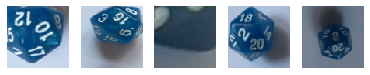

In [13]:
plots(train_batches[1][0],figsize=(100,70))

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import model_from_json


In [15]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 5e-4 *0.99**x)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Conv2D(filters=512, kernel_size=(3,3), padding='SAME', activation='relu'))
#model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       2

In [18]:
model.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])
history2= model.fit_generator(train_batches, steps_per_epoch= len(train_batches) , 
                             validation_data=test_batches, validation_steps= len(test_batches), 
                             epochs=150)

Epoch 1/150
310/310 [==============================] - 824s 3s/step - loss: 3.4285 - accuracy: 0.0839 - val_loss: 3.0766 - val_accuracy: 0.0917
Epoch 2/150
310/310 [==============================] - 554s 2s/step - loss: 2.8134 - accuracy: 0.1335 - val_loss: 2.8539 - val_accuracy: 0.1469
Epoch 3/150
310/310 [==============================] - 546s 2s/step - loss: 2.5835 - accuracy: 0.1968 - val_loss: 2.7700 - val_accuracy: 0.1826
Epoch 4/150
310/310 [==============================] - 346s 1s/step - loss: 2.3946 - accuracy: 0.2509 - val_loss: 2.5347 - val_accuracy: 0.2594
Epoch 5/150
310/310 [==============================] - 347s 1s/step - loss: 2.2146 - accuracy: 0.3077 - val_loss: 2.5199 - val_accuracy: 0.2826
Epoch 6/150
310/310 [==============================] - 349s 1s/step - loss: 2.0199 - accuracy: 0.3683 - val_loss: 2.3315 - val_accuracy: 0.3545
Epoch 7/150
310/310 [==============================] - 348s 1s/step - loss: 1.8461 - accuracy: 0.4255 - val_loss: 2.3154 - val_accuracy:

310/310 [==============================] - 347s 1s/step - loss: 0.3857 - accuracy: 0.9013 - val_loss: 2.0681 - val_accuracy: 0.8013
Epoch 58/150
310/310 [==============================] - 347s 1s/step - loss: 0.3806 - accuracy: 0.9023 - val_loss: 2.1903 - val_accuracy: 0.7930
Epoch 59/150
310/310 [==============================] - 349s 1s/step - loss: 0.3567 - accuracy: 0.9074 - val_loss: 2.0040 - val_accuracy: 0.8029
Epoch 60/150
310/310 [==============================] - 351s 1s/step - loss: 0.3737 - accuracy: 0.9088 - val_loss: 2.1020 - val_accuracy: 0.8054
Epoch 61/150
310/310 [==============================] - 346s 1s/step - loss: 0.3808 - accuracy: 0.9059 - val_loss: 2.1823 - val_accuracy: 0.7990
Epoch 62/150
310/310 [==============================] - 343s 1s/step - loss: 0.3840 - accuracy: 0.9083 - val_loss: 2.0874 - val_accuracy: 0.8055
Epoch 63/150
310/310 [==============================] - 348s 1s/step - loss: 0.3829 - accuracy: 0.9093 - val_loss: 2.0848 - val_accuracy: 0.805

Epoch 113/150
310/310 [==============================] - 213s 689ms/step - loss: 0.3870 - accuracy: 0.9371 - val_loss: 3.4953 - val_accuracy: 0.8105
Epoch 114/150
310/310 [==============================] - 235s 759ms/step - loss: 0.3710 - accuracy: 0.9362 - val_loss: 3.8990 - val_accuracy: 0.8375
Epoch 115/150
310/310 [==============================] - 264s 850ms/step - loss: 0.3542 - accuracy: 0.9393 - val_loss: 4.2502 - val_accuracy: 0.8172
Epoch 116/150
310/310 [==============================] - 253s 818ms/step - loss: 0.3350 - accuracy: 0.9414 - val_loss: 3.8214 - val_accuracy: 0.8331
Epoch 117/150
310/310 [==============================] - 248s 799ms/step - loss: 0.3397 - accuracy: 0.9419 - val_loss: 3.9416 - val_accuracy: 0.8370
Epoch 118/150
310/310 [==============================] - 250s 808ms/step - loss: 0.3303 - accuracy: 0.9427 - val_loss: 3.7109 - val_accuracy: 0.8354
Epoch 119/150
310/310 [==============================] - 239s 772ms/step - loss: 0.3593 - accuracy: 0.9388

In [19]:
model_json = model.to_json()
with open("model_1d20_zoom.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/

model.save('model_1d20_zoom.h5')